# Implementation of the Cyberemotions agent-based modeling framework

The following documentation is (I.) a collection of test run results that illustrate agent valence and arousal, and (II.) the commented model code itself.

The model requires the following packages to run:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Table of contents

1. [Model test runs](##1.-Model-test-runs)
   * [150 agents](###150-agents)
   * [10 agents](###10-agents)
   * [50 agents](###50-agents)
   * [500 agents](###500-agents)
   * [1000 agents](###1000-agents)
2. [Commented model code](##2.-Commented-model-code)
   1. [Agent procedures](###1.-Agent-procedures)
      * [Perception](####Perception)
      * [Expression](####Expression)
      * [Relaxation](####Relaxation)
      * [Satiation](####Satiation)
      * [Agent data collection](####Agent-data-collection)
   2. [Field procedures](###2.-Field-procedures)
      * [Communication](####Communication)
      * [Field data collection](####Field-data-collection)
   3. [General scheduling](###2.-General-scheduling)

## I. Model test runs

In [2]:
import model

The function `start_simulation()` of the `model` module starts the simulation and takes the following arguments as inputs:
* Maximum number of time steps before the simulation ends.
* Number of agents at the start of the simulation.

The model runs until all the agents are satiated and drop out, or until the maximum number of time steps is reached.

The standard model parameters are hardcoded, unless otherwise specified, as follows:

| Parameter | Short | Value | Constant
|---|---|---|---|
| Valence baseline | b | 0.056 | VALENCE_B |
| Arousal baseline | d | -0.442 | AROUSAL_B |
| Valence decay | &gamma;<sub>v</sub> | 0.367 | VALENCE_DECAY |
| Arousal decay | &gamma;<sub>a</sub> | 0.414 | AROUSAL_DECAY |
| Amplitudes | A<sub>v</sub> | 0.3 | VALENCE_AMP |
|| A<sub>a</sub> | 0.3 | AROUSAL_AMP |
| Arousal threshold | &tau; | 0 | AR_THRESHOLD |
| Down-regulation factor | k<sub>v</sub> | 0.38 | VALENCE_K |
|| k<sub>a</sub> | 0.45 | AROUSAL_K |
| Valence coefficients | b<sub>0</sub> | 0.14 | COEFF_B0 |
|| b<sub>1</sub> | 0 | COEFF_B1 |
|| b<sub>2</sub> | 0.057 | COEFF_B2 |
|| b<sub>3</sub> | -0.047 | COEFF_B3 |
| Arousal coefficients | d<sub>0</sub> | 0.178 | COEFF_D0 |
|| d<sub>1</sub> | 0.14469 | COEFF_D1 |
|| d<sub>2</sub> | 0 | COEFF_D2 |
|| d<sub>3</sub> | 0 | COEFF_D3 |
| Field charge | h | 0 | FIELD_H |
| Field decay | &gamma;<sub>h</sub> | 0.7 | FIELD_DECAY |
| Field impact | s | 0.1 | FIELD_IMPACT |

Using these settings, the impact of agent expressions on the field _s_ remain constant, regardless of the number of agents in the simulation. Initial trial runs revealed that the value 0.1 only allows for emerging collective emotions when the number of agents is approximately 150. For this reason, the the constant _s_ was instead set to `15 / total_number_of_agents`. As the following plots illustrate, this scaling of the impact variable allows for collective emotions to emerge at any number of agents.

### 150 agents

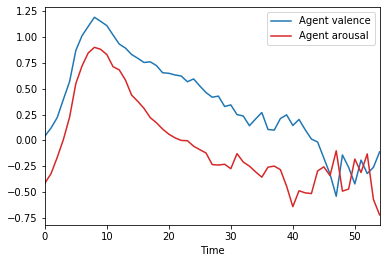

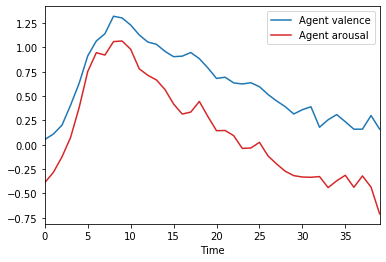

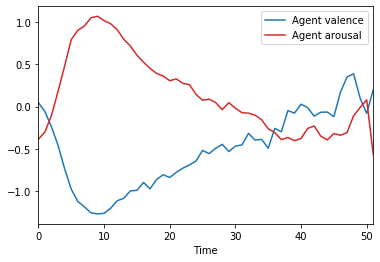

<Figure size 432x288 with 0 Axes>

In [3]:
n = 3
for i in range(n):
    model.analyze_data(model.start_simulation(150,150))

### 10 agents

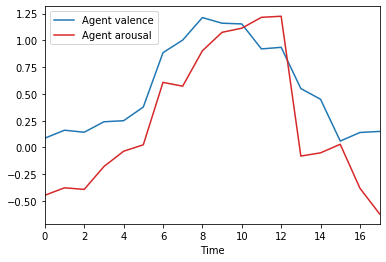

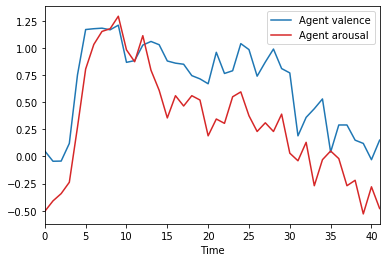

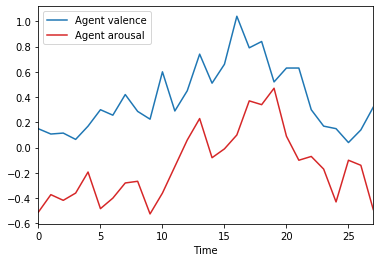

<Figure size 432x288 with 0 Axes>

In [4]:
n = 3
for i in range(n):
    model.analyze_data(model.start_simulation(150,10))

### 50 agents

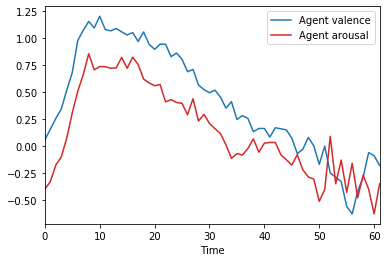

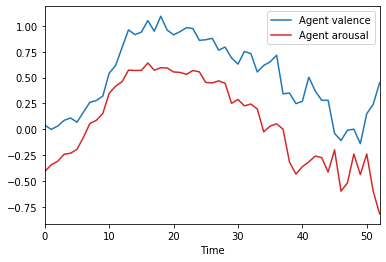

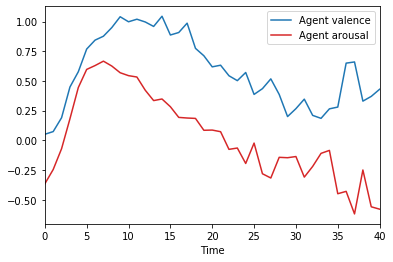

<Figure size 432x288 with 0 Axes>

In [5]:
n = 3
for i in range(n):
    model.analyze_data(model.start_simulation(150,50))

### 500 agents

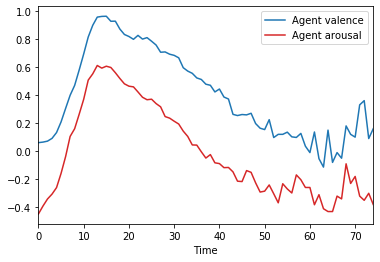

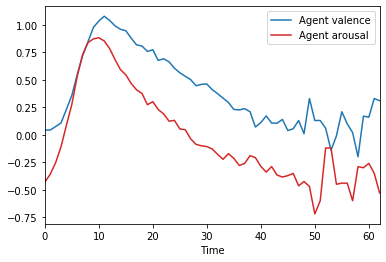

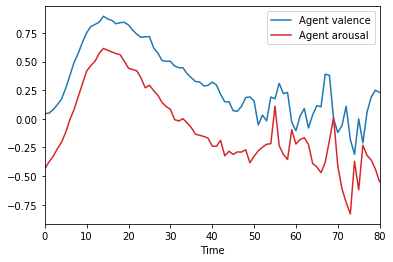

<Figure size 432x288 with 0 Axes>

In [6]:
n = 3
for i in range(n):
    model.analyze_data(model.start_simulation(150,500))

### 1000 agents

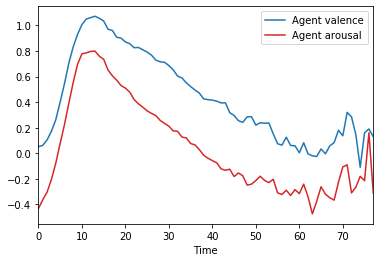

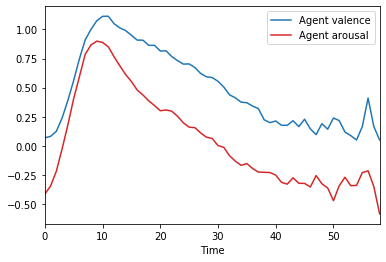

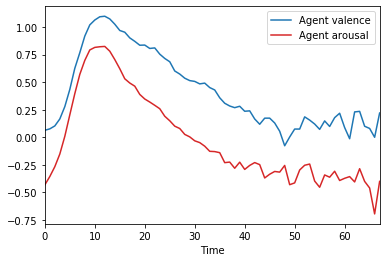

<Figure size 432x288 with 0 Axes>

In [7]:
n = 3
for i in range(n):
    model.analyze_data(model.start_simulation(150,1000))

## II. Commented model code

The following section is structured as follows:
1. Agent procedures
2. Field procedures
3. General scheduling

### 1. Agent procedures

In [ ]:
class Agent:
    '''Class describing one agent instance and its state variables.'''
    def __init__(self):
        self.baseline_v = np.random.normal(BASE_V, 0.1)
        self.baseline_a = np.random.normal(BASE_A, 0.1)
        # Note: Spread of the normal distrution should not cause valence or
        # arousal baselines to lie above 1 or below -1
        self.valence = self.baseline_v
        self.arousal = self.baseline_a
        self.threshold = THRESH_A
        self.history_v = []
        self.history_a = []

#### Perception

In [ ]:
    def perception(self, field):
        '''Method changing the agent state variables given their perception of
        the field, using its state variable as input and adding stochasticity
        to global change coefficients'''
        self.valence += field.sign_h * (COEFF_B0 +
                                        COEFF_B1 * self.valence +
                                        COEFF_B2 * self.valence ** 2 +
                                        COEFF_B3 * self.valence ** 3)
        self.arousal += field.absolute_h * (COEFF_D0 +
                                            COEFF_D1 * self.arousal +
                                            COEFF_D2 * self.arousal ** 2 +
                                            COEFF_D3 * self.arousal ** 3)
        # Note: Coefficients B3 and D3 sometimes caused the program not to
        # execute during first test runs due to an "result too large" error.

        # Stochastic shocks triggering agent interaction:
        self.valence += AMP_V * np.random.randint(-100, 100) / 100
        self.arousal += AMP_A * np.random.randint(-100, 100) / 100

#### Expression

In [ ]:
    def expression(self):
        '''Method checking if an agent expresses its emotions, down-regulating
        them using global factors, and returning information whether it is
        a positive or negative emotion, or none at all.'''
        if self.arousal >= self.threshold:
            emotion = np.sign(self.valence) # Variable needed for scheduling!
            self.valence = ((self.valence - self.baseline_v) * FACTOR_V
                            + self.baseline_v)
            self.arousal = ((self.arousal - self.baseline_a) * FACTOR_A
                            + self.baseline_a)
        else:
            emotion = None

        return emotion


#### Relaxation

In [ ]:
    def relaxation(self):
        '''Method relaxing the emotions of an agent towards their respective
        baselines, using the global decay parameter.'''
        self.valence += (-1) * DECAY_V * (self.valence - self.baseline_v)
        self.arousal += (-1) * DECAY_A * (self.arousal - self.baseline_a)

#### Satiation

In [ ]:
    def satiation(self):
        '''Method checking whether an agent drops out of the simulation given
        the current emotional state and returning a boolean value.'''
        probability = np.absolute(self.arousal ** 2 * 100)
        chance = np.random.randint(0, 100)
        return bool(chance <= probability)

#### Agent data collection

In [ ]:
    def collect_data(self):
        '''Method collecting the agent state variables in a list.'''
        self.history_v.append(round(self.valence, 2))
        self.history_a.append(round(self.arousal, 2))

### 2. Field procedures

In [ ]:
class Field:
    '''Class describing the communication field and its state variables'''
    def __init__(self):
        self.absolute_h = CHARGE_H
        self.sign_h = CHARGE_H
        self.history = []
        self.expressions = []

#### Communication

In [ ]:
    def communication(self, positive_expressions, negative_expressions):
        '''Method changing the field state variable using positive and
        negative emotional expressions as input, adding decay over time using
        a global parameter.'''
        absolute_expressions = positive_expressions + negative_expressions
        sign_expressions = positive_expressions - negative_expressions

        self.absolute_h += (-1 * DECAY_H * self.absolute_h +
                            IMPACT_H * absolute_expressions)
        self.sign_h += (-1 * DECAY_H * self.sign_h +
                        IMPACT_H * sign_expressions)

#### Field data collection

In [ ]:
    def collect_data(self):
        '''Method collecting the field state variable in a list.'''
        self.history.append(round(self.sign_h, 2))

### 3. General scheduling

In [ ]:
def start_simulation(time, agents):
    '''Function starting the simulation and running the model using the number
    of agents and the maximum number of time steps as arguments. Its output is
    a dictionary using "valence", "arousal", and "field" as key to access
    respective dataframes of the history of agent and field state variables.'''
    agent_list = [Agent() for agent in range(agents)]
    field = Field()
    histories_v = []
    histories_a = []
    history_f = []
    history_n = []
    history_agents = []

In [ ]:
    # The simulation ends when all the agents dropped out, or when the maximum
    # number of time steps was reached:
    step = 0
    while step < time and len(agent_list) >= 1:
        step += 1
        positive_expressions = 0
        negative_expressions = 0

        for agent in agent_list:
#            agent.collect_data() # For exploration purposes, changes data
            agent.perception(field)
            # These if-elif statements force agent state variables to remain
            # below 1 and above -1.
#            if agent.valence > 1: agent.valence = 1
#            elif agent.valence < -1: agent.valence = -1
#            if agent.arousal > 1: agent.arousal = 1
#            elif agent.arousal < -1: agent.arousal = -1
            agent.collect_data()
            # Note: Agent data is collected once per time step and this seems
            # to be the most useful moment, because it captures the emotional
            # high points of the agents.
            emotion = agent.expression()
            if emotion == 1:
                positive_expressions += 1
            elif emotion == -1:
                negative_expressions += 1
#            else:
#                pass
#            agent.collect_data() # For exploration purposes, changes data
            if agent.satiation(): # Need to collect data before dropout
                histories_v.append(agent.history_v)
                histories_a.append(agent.history_a)
                agent_list.remove(agent)
#            else:
#                pass
            agent.relaxation()
            # Making sure the order the agents act in is not the same at every
            # time step by shuffling the agent list:
            np.random.shuffle(agent_list)

        field.communication(positive_expressions, negative_expressions)
        field.collect_data()
        history_n.append(positive_expressions + negative_expressions)
        history_agents.append(len(agent_list))

    for agent in agent_list:
        histories_v.append(agent.history_v)
        histories_a.append(agent.history_a)

    history_f.append(field.history)